# Project A: Analysis of Calcium Imaging Data

**Project Overview**

In this project you will be provided with imaging data from an experiment in head-fixed mice. The data stem from two animals in which different regions of the hippocampus were recorded, the dentate gyrus (DG) and area CA1. For each animal you will get both, a continuous signal representing the Ca2+ level in the neurons and a binary signal representing detected Calcium events. The goal is to explore the neural activity of the two different regions on a basic level.
<br />
<br />

**What you can expect from this project:**
- use pandas to filter data
- use numpy for basic arithmetic operations
- plot histograms, timeseries, and box plots
- generate an artifical spike train
- apply some statistical tests
- get an impression of how Calcium imaging data look like
<br />
<br />

**Questions to answer:**
1. Is the distribution of inter-event intervals different between the two hippocampal areas?
2. Are the IEI distributions different from one of a random poisson process? 
3. The binary signal is result of a thresholding analysis, how well do you think it fits to the underlying continuous data?
4. Is the average continuous signal of neurons with higher event rate indeed higher as expected?
5. Is there a difference in how correlated neural activity is in the two regions? 
<br />
<br />

-----------------------------------

*Let’s get started…*

### Download the data
Run the cell below to download the data from sciebo. The data will be stored in the folder "day_4/project_A/data". You will see 2 .csv files, each containing data of two animals:
- data_continuous.csv
- data_binary.csv

Some Information about the data:

| Type of information | Value |
| ------ | ----------- |
| Framerate | 15 Hz |
| time/frame | 0.067s |
| Calcium sensor | GCaMP6s |
| Continuous data | df/f |


<span style="color:mediumseagreen">Explanatory note on "df/f":</span> "df/f" is an abbreviation for "delta f over f" and describes an operation which is commonly applied to continuous imaging signals in order to calculate the deviation of the signal at each timepoint from a (often preceding) baseline value and normalize it to some value (often the mean/median/ a percentile of the whole signal is used). This helps to "clean" the signal from baseline drifts and the normalization step allows the comparison of signals from different neurons with different baseline signal intensities (e.g. due to different levels of sensor expression).

In [3]:
# import sciebo

# sciebo.download_file_from_sciebo('https://uni-bonn.sciebo.de/s/aLuGqYoZRFgwhzF', 'data', 'data_endoscope.tif')
# sciebo.download_file_from_sciebo('https://uni-bonn.sciebo.de/s/aLuGqYoZRFgwhzF', 'data', 'data_endoscope.tif')

---------------------------------------

### Open the data 

To do:
- Import the necessary libraries
- Open the data as dataframes
- Inspect the data


In [4]:
# Import libraries
import pandas as pd

In [5]:
# Open data as dataframes
file_continuous = "./data/fake_df.csv"
file_binary = "./data/fake_binary.csv"

df_continuous = pd.read_csv(file_continuous , sep=",")
df_binary = pd.read_csv(file_binary, sep=",")

In [6]:
# Inspect data
print(df_continuous.head())
print(df_binary.head())

  Region Animal  Neuron         1         2         3         4         5  \
0    CA1     xx       1  2.439687  0.747347  1.166246  1.324258  2.280689   
1    CA1     xx       2  2.975199  0.212489  2.176459  2.452207  4.341680   
2    CA1     xx       3  3.453728  2.281572  4.665745  2.376783  2.474470   
3    CA1     xx       4  1.736280  2.848181  0.084355  3.995989  0.141418   
4    CA1     xx       5  2.246770  2.323099  3.896707  2.117511  3.016367   

          6         7  ...       101       102       103       104       105  \
0  1.904902  0.496747  ...  2.185981  4.723871  4.426165  1.177280  1.560380   
1  4.138617  0.292201  ...  1.793341  1.060972  3.306951  4.634577  0.895222   
2  0.154252  3.925923  ...  3.906223  3.395527  0.520451  1.957105  1.571203   
3  4.090540  2.028192  ...  3.110941  1.895102  4.680686  4.443016  0.330254   
4  3.442339  4.940028  ...  3.774950  3.260826  2.044951  1.042624  4.271014   

        106       107       108       109       110  
0 

---------------------------------------

### 1. Is the distribution of IEIs different between the two hippocampal areas? 

To do:
- Import the necessary libraries
- Filter the binary data by brain region
- Convert the resulting dataframe to a numpy matrix of shape neurons x timepoints
- Calculate the inter-event intervals (IEIs) for all neurons of one hippocampal region
- Plot the IEIs as histogram
- Perform a statistical test comparing the two distributions


<span style="color:mediumseagreen">Explanatory note on IEIs:</span> you may have heard of inter-spike intervals, however, here we are dealing with Ca^2+^ imaging, which can only be used as proxy for neural activity and inference of underlying spikes is challenging. The binary Ca^2+^ event data are marking onsets of Ca^2+^ events (not actual spikes) and hence we talk about inter-event intervals. Nevertheless, having this constraint in mind, the data can be used to draw some conclusions about neural activity.

<span style="color:mediumseagreen">Event rate vs IEI:</span> Often the (spike or event) rate is used to assess neural activity. While this is an easy-to-use measure, it occludes any information about the distribution of events (are there many of them happening in a small window of time or are they spread evenly across time?) and thereby information about neural activity dynamics. (TODO: Olli)

In [7]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [8]:
# Filter the binary data by region and convert the resulting dataframe to a numpy matrix
# Hint: extract some useful information, e.g. the number of neurons in each region

DG_binary = df_binary[df_binary['Region'] == 'DG'].drop(['Region', 'Animal', 'Neuron'], axis=1).to_numpy()
CA1_binary = df_binary[df_binary['Region'] == 'CA1'].drop(['Region', 'Animal', 'Neuron'], axis=1).to_numpy()

# ...or you could do it step-by-step instead of all in one line:

# # Filter by Region and save in new dataframe
# df_DG = df_binary[df_binary['Region'] == 'DG']
# df_CA1 = df_binary[df_binary['Region'] == 'CA1']

# # Drop columns that carry additional information
# df_DG = df_DG.drop(['Region', 'Animal', 'Neuron'], axis=1)
# df_CA1 = df_CA1.drop(['Region', 'Animal', 'Neuron'], axis=1)

# # Convert to numpy array
# DG_binary = df_DG.to_numpy()
# CA1_binary = df_CA1.to_numpy()

# Number of neurons
n_DG = DG_binary.shape[0]
n_CA1, n_frames = CA1_binary.shape


In [9]:
# Calculate the IEIs

# Information of time per frame [in s]
fs = 0.067

# Get the indices of the timepoints at which there is an event (= 1)
# Hint: np.nonzero() returns a tuple, you only need the first element of the tuple 
DG_onsets = [np.nonzero(DG_binary[x,:])[0] for x in range(n_DG)]
CA1_onsets = [np.nonzero(CA1_binary[x,:])[0] for x in range(n_CA1)]

# ...or it can be solved with a classic for loop:
# DG_onsets = []
# for x in range(n_DG):
#     DG_onsets.append(np.nonzero(DG_binary[x,:]))

# CA1_onsets = []
# for x in range(n_CA1):
#     CA1_onsets.append(np.nonzero(CA1_binary[x,:]))

# Calculate the delta in sec between events and write into one list
ieis_DG = []
for onsets in DG_onsets:
    ieis_DG.extend(np.diff(onsets) * fs)

ieis_CA1 = []
for onsets in CA1_onsets:
    ieis_CA1.extend(np.diff(onsets) * fs)

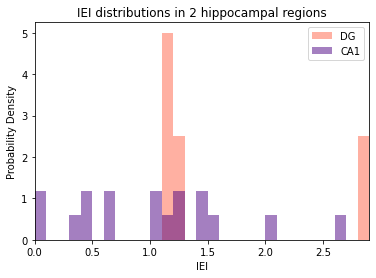

In [10]:
# Plot histograms

# Define bin size [in s]
dt = 0.1

# Find maximum IEI
max_iei = np.max(ieis_DG + ieis_CA1)

# Define bin edges
bin_edges = np.arange(0,max_iei, dt)

# Assign colors to the two regions
color_DG = 'tomato'
color_CA1 = 'indigo'

# Plot histogram
# Hint: when you add a semicolon at the end of the line, the values are not printed in addition to the plot
plt.hist(ieis_DG, bins=bin_edges, density = True, color=color_DG, alpha= .5, label='DG');
plt.hist(ieis_CA1, bins=bin_edges, density = True, color=color_CA1, alpha= .5, label='CA1');
plt.xlabel('IEI')
plt.ylabel('Probability Density')
plt.legend()
plt.title('IEI distributions in 2 hippocampal regions')
plt.xlim((bin_edges[0], bin_edges[-1]));

In [11]:
# Perform a statistical test (TODO Olli)

# Check normal distribution of data using Shapiro-Wilk test
# Hint: if the p-Value is significant, the data are not normally distributed
# and the Mann-Whitney U test should be used instead of a t-test to compare the distributions 
w_DG, pvalue_DG = stats.shapiro(ieis_DG)
w_CA1, pvalue_CA1 = stats.shapiro(ieis_CA1)
print(f'p-Value DG: {pvalue_DG}')
print(f'p-Value CA1: {pvalue_CA1}')

# Perform a two-sided MWU test
# Hint: if the p-Value is significant, the H0 (that the two distributions stem from one population) can be rejected,
# i.e. we can assume that the distribution of IEIs in the DG and CA1 are indeed different
mwu_result = stats.mannwhitneyu(x=ieis_DG, y=ieis_CA1, alternative = 'two-sided')
print(mwu_result)

# Or: Perform a t-test for independent samples
# Hint: if the p-Value is significant, the H0 (that the two distributions stem from one population) can be rejected,
# i.e. we can assume that the distribution of IEIs in the DG and CA1 are indeed different
tt_result = stats.ttest_ind(a=ieis_DG, b=ieis_CA1, alternative = 'two-sided')
print(tt_result)

p-Value DG: 0.0034077269956469536
p-Value CA1: 0.21280115842819214
MannwhitneyuResult(statistic=47.0, pvalue=0.3699280252040905)
Ttest_indResult(statistic=1.0109395108844696, pvalue=0.32412036717621107)


<span style="color:violet">**Question:**</span>

What does this tell you about the recorded neuron populations?

<span style="color:tomato">**Hints:**</span>

| Goal | Function |
| ------ | ----------- |
| get rid of columns | DataFrame.drop() |
| get nonzero elements of an array | numpy.nonzero() |
| adding elements of list to another list | list.extend() |
| plot a histogram | matplotlib.pyplot.hist() |
| perform a Shapiro-Wilk test | scipy.stats.shapiro() |
| perform a Mann-Whitney U test | scipy.stats.mannwhitneyu() |
| perform a t-test for independent samples | scipy.stats.ttest_ind() |

**Bonus:**
- Calculate the Coefficient of Variation (CV) for the two distributions
- Calculate the Fano factor for the two distributions
- What do they tell you?

In [12]:
# Coefficient of Variation
cv_DG = np.std(ieis_DG)/ np.mean(ieis_DG)
cv_CA1 = np.std(ieis_CA1)/ np.mean(ieis_CA1)

# Fano Factor (TODO Olli)
ff_DG = np.var(ieis_DG)/ np.mean(ieis_DG)
ff_CA1 = np.var(ieis_CA1)/ np.mean(ieis_CA1)

print(f'The CV of the DG IEIs is {round(cv_DG, ndigits=3)} and its Fano factor is {round(ff_DG, ndigits=3)}')
print(f'The CV of the CA1 IEIs is {round(cv_CA1, ndigits=3)} and its Fano factor is {round(ff_CA1, ndigits=3)}')

The CV of the DG IEIs is 0.455 and its Fano factor is 0.326
The CV of the CA1 IEIs is 0.694 and its Fano factor is 0.541


---------------------------------------

### 2. Are the IEI distributions different from one of a random poisson process? 

To do:
- Import the necessary libraries
- Calculate the event rate of each neuron for both regions
- Generate a poisson process matching each neuron's event rate
- Extract the IEIs for each of these artificial event trains and pool for each region across neurons
- Plot the real and artificial distributions for both hippocampal regions
- Compare the real and artificial distribution of each brain region using a statistical test

<span style="color:mediumseagreen">Poisson model of spike generation:</span>

- Generation of a random poisson process using python (chapter 6.5): https://mrgreene09.github.io/computational-neuroscience-textbook/Ch5.html
- Something more theoretical: https://www.cns.nyu.edu/~david/handouts/poisson.pdf

In [13]:
# Calculate the event rate of each neuron for both regions
rates_DG = DG_binary.sum(axis = 1) / (n_frames*fs)
rates_CA1 = CA1_binary.sum(axis = 1) / (n_frames*fs)

In [14]:
# Generate a poisson process matching each neuron's event rate
# Hints:
# 1) calculate the probability of an event occurring in one time bin,
#    where one bin has the same duration as one frame in the real recordings. --> p = event_rate * time_per_frame
# 2) create a vector of random numbers between 0 and 1 with a length of the number or frames in the real recording
# 3) for each value in this vector check if it exceeds the probability calculated in 1).
#    If yes, mark it with a 1. If No, mark it with a 0.
# 4) Repeat steps 1-3 for each neuron.

# DG
DG_art_binary = np.zeros_like(DG_binary)
for neuron in range(n_DG):
    prob = rates_DG[neuron] * dt
    DG_art_binary[neuron,:] = (np.random.rand(n_frames) < prob) * 1

# CA1
CA1_art_binary = np.zeros_like(CA1_binary)
for neuron in range(n_CA1):
    prob = rates_CA1[neuron] * dt
    CA1_art_binary[neuron,:] = (np.random.rand(n_frames) < prob) * 1

In [15]:
# Extract IEIs of these artificial event trains
# Hint: you just need to repeat what you did for answering the first question

DG_art_onsets = [np.nonzero(DG_art_binary[x,:])[0] for x in range(n_DG)]
CA1_art_onsets = [np.nonzero(CA1_art_binary[x,:])[0] for x in range(n_CA1)]

art_ieis_DG = []
for onsets in DG_art_onsets:
    art_ieis_DG.extend(np.diff(onsets) * fs)

art_ieis_CA1 = []
for onsets in CA1_art_onsets:
    art_ieis_CA1.extend(np.diff(onsets) * fs)

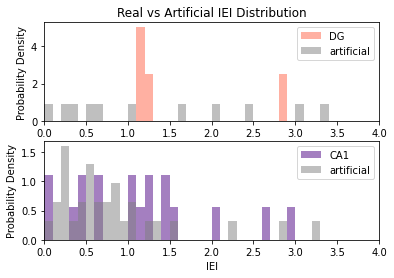

In [16]:
# Plot histograms
# Hint: you can use subplots to plot the corresponding real and artificial data from both regions at the same time

# Define bin size [in s]
dt = 0.1

# Find maximum IEI
max_iei = np.max(ieis_DG + ieis_CA1 + art_ieis_DG + art_ieis_CA1)

# Define bin edges
bin_edges = np.arange(0,max_iei, dt)

# Assign colors to the two regions
color_art = 'gray'

plt.subplot(2,1, 1)
plt.hist(ieis_DG, bins=bin_edges, density = True, color=color_DG, alpha= .5, label='DG');
plt.hist(art_ieis_DG, bins=bin_edges, density = True, color=color_art, alpha= .5, label='artificial');
plt.ylabel('Probability Density')
plt.legend()
plt.title('Real vs Artificial IEI Distribution')
plt.xlim((bin_edges[0], bin_edges[-1]));

plt.subplot(2,1,2)
plt.hist(ieis_CA1, bins=bin_edges, density = True, color=color_CA1, alpha= .5, label='CA1');
plt.hist(art_ieis_CA1, bins=bin_edges, density = True, color=color_art, alpha= .5, label='artificial');
plt.xlabel('IEI')
plt.ylabel('Probability Density')
plt.legend()
plt.xlim((bin_edges[0], bin_edges[-1]));

In [17]:
# Perform a statistical test
# Hint: you know already from answering question 1 if your data are distributed normally or not.
# You just need to repeat the same statistical test that you used before.

# Perform a two-sided MWU test
# Hint: if the p-Value is significant, the H0 (that the two distributions stem from one population) can be rejected,
# i.e. we can assume that the distribution of IEIs in the DG and CA1 are indeed different
mwu_result_DG = stats.mannwhitneyu(x=ieis_DG, y=art_ieis_DG, alternative = 'two-sided')
print('DG:')
print(mwu_result_DG)

mwu_result_CA1 = stats.mannwhitneyu(x=ieis_CA1, y=art_ieis_CA1, alternative = 'two-sided')
print('CA1:')
print(mwu_result_CA1)

DG:
MannwhitneyuResult(statistic=27.0, pvalue=0.7615906111003945)
CA1:
MannwhitneyuResult(statistic=355.0, pvalue=0.17853497985146483)


<span style="color:violet">**Question:**</span>

Are the real and artificial distributions similar? What does it mean if yes/no?

<span style="color:tomato">**Hints:**</span>

| Goal | Function |
| ------ | ----------- |
| create an array of zeros with same size as some other array | numpy.zeros_like() |
| generate random numbers between [0, 1) | numpy.random.rand() |
| convert a boolean to int array | some_bool_array * 1 |
| plot two figures in one, use subplots | matplotlib.pyplot.subplot() |
| avoid overlap of subplot titles/labels | matplotlib.pyplot.tight_layout() |

---------------------------------------

### 3. How well does the binary signal fit to the underlying continuous data? 

To do:
- Obtain following quantiles of event rates for both regions: Q-25, Q-50, Q-75
- For each region, find 2 neurons such that each meets one of follwing criteria:
  1) has an event rate r < Q-25,
  3) has an event rate r > Q-75
- We now need the contiuous data: filter them by brain region and convert the resulting dataframe to a numpy matrix of shape neurons x timepoints
- Get the indices of the timepoints at which there is an event for the selected neurons
- Plot the continuous signal of these neurons
- Plot the event from the binary data on top

In [18]:
# Obtain following quantiles of event rates for both regions: Q-25, Q-50, Q-75
# Note: the Q-50 will be needed for question 4

quantile_probabilities = [0.25, 0.5, 0.75]
quantiles_DG = np.quantile(rates_DG, quantile_probabilities)
quantiles_CA1 = np.quantile(rates_CA1, quantile_probabilities)

In [19]:
#  For each region, find 2 neurons such that...
# ...one has an event rate r < Q-25,
# ...one has an event rate r > Q-75
# Hint: You can obtain all indices of neurons that meet the respective criterion
# and than just pick the first or any one of them for the current task (you can also compare several different ones)

# DG 
ind_q1_DG = np.nonzero((rates_DG < quantiles_DG[0])*1)
ind_q4_DG = np.nonzero((rates_DG >= quantiles_DG[-1])*1)
print(f'DG neurons within the 1st quartile are: {ind_q1_DG[0]}')
print(f'DG neurons within the 4th quartile are: {ind_q4_DG[0]}')

# CA1
ind_q1_CA1 = np.nonzero((rates_CA1 < quantiles_CA1[0])*1)
ind_q4_CA1 = np.nonzero((rates_CA1 >= quantiles_CA1[-1])*1)
print(f'CA1 neurons within the 1st quartile are: {ind_q1_CA1[0]}')
print(f'CA1 neurons within the 4th quartile are: {ind_q4_CA1[0]}')


DG neurons within the 1st quartile are: []
DG neurons within the 4th quartile are: [ 2  4  5  6 13 14 17 18 19]
CA1 neurons within the 1st quartile are: []
CA1 neurons within the 4th quartile are: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


In [20]:
# Select which neurons from the lowest and highest quartile you want to plot
plot_neurons_DG = {'low_quartile': 6, 'high_quartile': 2}
plot_neurons_CA1 = {'low_quartile': 10, 'high_quartile': 1}

In [21]:
# We now need the contiuous data:
# Filter them by brain region and
# convert the resulting dataframe to a numpy matrix of shape neurons x timepoints
# (as you did with the binary data when answering question 1)

DG_continuous = df_continuous[df_continuous['Region'] == 'DG'].drop(['Region', 'Animal', 'Neuron'], axis=1).to_numpy()
CA1_continuous = df_continuous[df_continuous['Region'] == 'CA1'].drop(['Region', 'Animal', 'Neuron'], axis=1).to_numpy()

In [23]:
# Get the indices of the timepoints at which there is an event onset (= 1)
DG_onsets = [np.nonzero(DG_binary[x,:])[0] for x in plot_neurons_DG.values()]
CA1_onsets = [np.nonzero(CA1_binary[x,:])[0] for x in plot_neurons_CA1.values()]

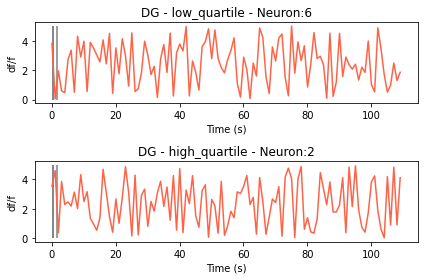

In [24]:
# Plot the continuous activity of the DG neurons you selected and overlay the events from the binary signal
# Hint 1: you can use plt.subplot again to plot the signals of the two neurons in one figure.
# (use a for loop if you do not want to type the code twice)
# Hint 2: you can use another for loop (maybe within the first loop) to plot the binary events

timepoints = np.arange(n_frames) + fs

for cnt,id in enumerate(plot_neurons_DG.values()):

    plt.subplot(2,1,cnt+1)
    
    # Plot continuous signal
    plt.plot(timepoints, DG_continuous[id,:], color=color_DG, label='continuous');

    # Plot the binary events
    max_y = np.ceil(np.max(DG_continuous[id,:]))
    min_y = np.floor(np.min(DG_continuous[id,:]))
    for onset in DG_onsets:
        plt.vlines(onset*fs, ymin= min_y, ymax=max_y, color=color_art)
    
    plt.xlabel('Time (s)')
    plt.ylabel('df/f')
    plt.title('DG' + ' - ' + list(plot_neurons_DG.keys())[cnt] + ' - Neuron:' + str(id))
    plt.tight_layout()


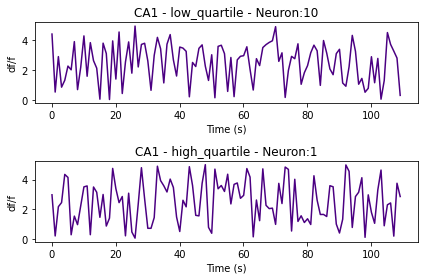

In [25]:
# Plot the continuous activity of the CA1 neurons you selected and overlay the events from the binary signal
# (same as above, just for CA1)

for cnt,id in enumerate(plot_neurons_CA1.values()):

    plt.subplot(2,1,cnt+1)
    
    # Plot continuous signal
    plt.plot(timepoints, CA1_continuous[id,:], color=color_CA1, label='continuous');

    # Plot the binary events
    max_y = np.ceil(np.max(CA1_continuous[id,:]))
    min_y = np.floor(np.min(CA1_continuous[id,:]))
    for onset in CA1_onsets:
        plt.vlines(onset*fs, ymin= min_y, ymax=max_y, color=color_art)
    
    plt.xlabel('Time (s)')
    plt.ylabel('df/f')
    plt.title('CA1' + ' - ' + list(plot_neurons_CA1.keys())[cnt] + ' - Neuron:' + str(id))
    plt.tight_layout()

<span style="color:violet">**Question:**</span>

- What part of the event was detected for the binary signal?
- How well does it fit to the continuous signal?
- Do you think the detection algorithm is working well? If not, why? 

<span style="color:tomato">**Hints:**</span>

| Goal | Function |
| ------ | ----------- |
| get q-th quantile of data | numpy.quantile() |
| get both the index and value of a list item (useful for loops) | enumerate() |
| plot a vertical line | matplotlib.pyplot.vlines() |

---------------------------------------

### 4. Is the average continuous signal of neurons with higher event rate indeed higher as expected? 

To do:
- For each region, assign every neuron to one of 4 classes using the event rates and quantiles calculated above:
  1) neurons with event rate r < Q-25 (1^st^ quartile)
  2) neurons with event rate Q-25 < r < Q-50 (2^nd^ quartile)
  3) neurons with event rate Q-50 < r < Q-75 (3^rd^ quartile)
  4) neurons with event rate r > Q-75 (4^th^ quartile)
- Calculate the average intensity of each neurons continuous signal
- Use this to calculate the average (of the neuron-wise average) intensity for each of the 4 classes defined above
- Create a box plot displaying the different average continuous signal intensities per class for both regions
  


In [26]:
# Import libraries
import seaborn as sn

In [27]:
# Assign neurons to one of the 4 quartile classes

# Create a vector with class labels for DG
class_DG = np.zeros((n_DG,))
class_DG[rates_DG < quantiles_DG[0]] = 1
class_DG[(rates_DG >= quantiles_DG[0]) & (rates_DG < quantiles_DG[1])] = 2
class_DG[(rates_DG >= quantiles_DG[1]) & (rates_DG < quantiles_DG[2])] = 3
class_DG[rates_DG >= quantiles_DG[2]] = 4 

# Create a vector with class labels for CA1
class_CA1 = np.zeros((n_CA1,))
class_CA1[rates_CA1 < quantiles_CA1[0]] = 1
class_CA1[(rates_CA1 >= quantiles_CA1[0]) & (rates_CA1 < quantiles_CA1[1])] = 2
class_CA1[(rates_CA1 >= quantiles_CA1[1]) & (rates_CA1 < quantiles_CA1[2])] = 3
class_CA1[rates_CA1 >= quantiles_CA1[2]] = 4

In [30]:
# Calculate the average continuous signal intensity of each neuron
DG_signal_mean = np.mean(DG_continuous, axis=1)
CA1_signal_mean = np.mean(CA1_continuous, axis=1)


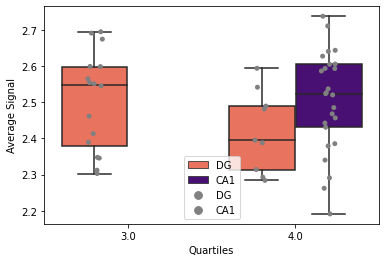

In [31]:
# Create a box plot where you compare for each region the average continuous signal for the quartiles
# Hint 1: when you use seaborn, it may be useful to combine the data to plot in a dictionary such that:
# {'class': class_vector, 'signal': neuron_mean_signal}
# Hint 2: you can try to plot the individual datapoints on top of the boxplot
# Hint 3: you can try to plot both regions in one plot

# # DG
# plot_data_DG = {'class': class_DG, 'signal': DG_signal_mean}
# sn.boxplot(data= plot_data_DG, x='class', y='signal', color=color_DG);
# sn.stripplot(data= plot_data_DG, x='class', y='signal', color=color_art);
# plt.xlabel('Quartiles');
# plt.ylabel('Average Signal');
# plt.title('DG');

# # CA1
# plt.figure()
# plot_data_CA1 = {'class': class_CA1, 'signal': CA1_signal_mean}
# sn.boxplot(data= plot_data_CA1, x='class', y='signal', color=color_CA1);
# sn.stripplot(data= plot_data_CA1, x='class', y='signal', color=color_art);
# plt.xlabel('Quartiles');
# plt.ylabel('Average Signal');
# plt.title('CA1');

# Plot both regions in one plot
plot_data = {'class': list(class_DG)+list(class_CA1), 'signal': list(DG_signal_mean)+list(CA1_signal_mean),
             'region': ['DG'] * n_DG + ['CA1'] * n_CA1}
sn.boxplot(data= plot_data, x='class', y='signal', hue='region', palette={'DG': color_DG, 'CA1': color_CA1});
sn.stripplot(data= plot_data, x='class', y='signal', hue='region', dodge=True, palette={'DG': color_art, 'CA1': color_art});
plt.xlabel('Quartiles');
plt.ylabel('Average Signal');

<span style="color:violet">**Question:**</span>

- Does the average signal intensity of neurons correspond to the quartiles that were based on the binary event data?
- What did you expect?
- How does this observation fit to what you observed in question 3?  

<span style="color:tomato">**Hints:**</span>

| Goal | Function |
| ------ | ----------- |
| apply two criteria to filter values, e.g. 0 < a > 1 | (a > 0) & (a < 1) |
| plot data points on top of boxplot | seaborn.stripplot() |

---------------------------------------

### 5. Is there a difference in how correlated neural activity is in the two regions?

To do:
- Calculate the Pearson correlation coefficient of all pairs of neurons within each hippocampal region
- Remove the diagonal and the lower triangle of the resulting square correlation coefficient matrices
- Plot the distributions of correlation coefficients of each region as histogram 
- Perform a statistical test (MWU, TODO: Olli)
- Bonus: Plot the correlation coefficients as heatmaps for better visualization

In [32]:
# Calculate pairwise pearson coefficient
corr_DG = np.corrcoef(DG_continuous)
corr_CA1 = np.corrcoef(CA1_continuous)

In [33]:
# Remove the diagonal and the lower triangle of the resulting square correlation coefficient matrices

corr_DG_upper = []
for x in range(n_DG-1):
    corr_DG_upper.extend(corr_DG[x,x+1:].tolist())

corr_CA1_upper = []
for x in range(n_CA1-1):
    corr_CA1_upper.extend(corr_CA1[x,x+1:].tolist())

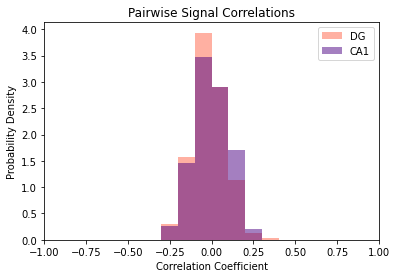

In [34]:
# Plot histograms

# Define bin edges
bin_edges = np.arange(-1,1.1, 0.1)

plt.hist(corr_DG_upper, bins=bin_edges, density = True, color=color_DG, alpha= .5, label='DG');
plt.hist(corr_CA1_upper, bins=bin_edges, density = True, color=color_CA1, alpha= .5, label='CA1');
plt.ylabel('Probability Density')
plt.xlabel('Correlation Coefficient')
plt.legend()
plt.title('Pairwise Signal Correlations')
plt.xlim((bin_edges[0], bin_edges[-1]));


In [35]:
# Perform a statistical test (TODO Olli)

# Check normal distribution of data using Shapiro-Wilk test
w_DG, pvalue_DG = stats.shapiro(corr_DG_upper)
w_CA1, pvalue_CA1 = stats.shapiro(corr_CA1_upper)
print(f'p-Value DG: {pvalue_DG}')
print(f'p-Value CA1: {pvalue_CA1}')

# Perform a two-sided MWU test or t-test for independent samples
mwu_result = stats.mannwhitneyu(x=corr_DG_upper, y=corr_CA1_upper, alternative = 'two-sided')
print(mwu_result)

tt_result = stats.ttest_ind(a=corr_DG_upper, b=corr_CA1_upper, alternative = 'two-sided')
print(tt_result)

p-Value DG: 0.7804911136627197
p-Value CA1: 0.38313043117523193
MannwhitneyuResult(statistic=41587.0, pvalue=0.1079822062854783)
Ttest_indResult(statistic=-1.5954028966405651, pvalue=0.11115048854998695)


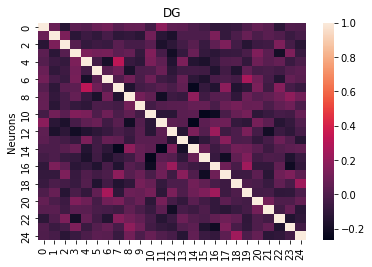

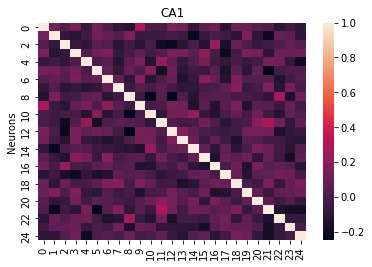

In [37]:
# Bonus: Plot heatmap
plt.figure()
sn.heatmap(corr_DG);
plt.ylabel('Neurons');
plt.title('DG');

plt.figure()
sn.heatmap(corr_CA1);
plt.ylabel('Neurons');
plt.title('CA1');

<span style="color:violet">**Question:**</span>

- Has one of the regions higher correlation values between its pairs of neurons?
- How could you interpret this?

<span style="color:tomato">**Hints:**</span>

| Goal | Function |
| ------ | ----------- |
| calculate Pearson correlation coefficient | numpy.corrcoef() |
| plot a heatmap | seaborn.heatmap() |

------------------------------------
*You did it!!*